In [25]:
import numpy as np

In [26]:
class KNNClassifier:

    def __init__(self, n_neighbours='auto', p=2):
        self.n_neighbours = n_neighbours
        self.p = p


    def fit(self, X, y):

        self.X = X
        self.y = y

        if self.n_neighbours == 'auto':
            self.n_neighbours = int(np.sqrt(len(self.X)))
            if self.n_neighbours % 2 != 0:
                self.n_neighbours += 1
        
        return self


    def predict(self, X):
#         dim_check([X], [2], ['X'])
        predictions = []
        self.confidence = []
        for pred_row in X:
            euclidean_distances = []
            for X_row in self.X:
                distance = np.linalg.norm(X_row - pred_row, ord=self.p)
                euclidean_distances.append(distance)

            neighbours = self.y[np.argsort(euclidean_distances)[:self.n_neighbours]]
            neighbours_bc = np.bincount(neighbours)
            prediction = np.argmax(neighbours_bc)
            self.confidence.append(neighbours_bc[prediction]/len(neighbours))
            predictions.append(prediction)

        predictions = np.array(predictions)
        return predictions

In [34]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [35]:
X,y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [36]:
knn = KNNClassifier()
knn.fit(X_train,y_train)

In [37]:
y_pred=knn.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


0.9666666666666667

<AxesSubplot: >

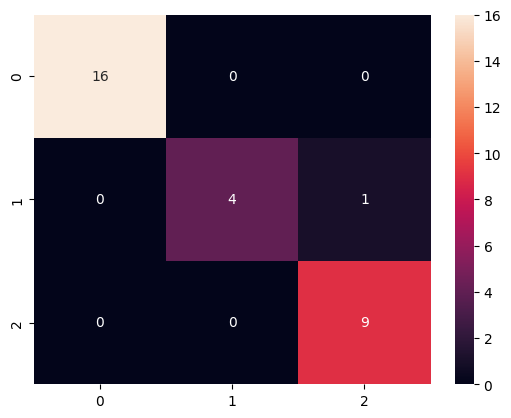

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred),annot = True)